In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split

sns.set()

In [2]:
df = pd.read_csv('data/otomoto_dataset.csv')
df.head()

,make,model,vehicle_year,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,rhd,target_price
0,audi,a6,2013.0,153817.0,1984.0,180.0,automatic,petrol,0.0,0.0,69900.0
1,skoda,fabia,2004.0,115000.0,1390.0,75.0,manual,petrol,0.0,0.0,8299.0
2,chevrolet,camaro,2012.0,299000.0,3600.0,323.0,automatic,petrol,0.0,0.0,54500.0
3,bmw,seria-3,2013.0,155000.0,1995.0,163.0,automatic,diesel,0.0,0.0,62000.0
4,renault,talisman,2017.0,167000.0,1600.0,130.0,automatic,diesel,0.0,0.0,52999.0


## Zapoznanie się ze zbiorem danych i wykrycie ewentualnych anomalii

In [4]:
df.shape

(206860, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206860 entries, 0 to 206859
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   make             206860 non-null  object 
 1   model            206860 non-null  object 
 2   vehicle_year     206860 non-null  float64
 3   mileage          205506 non-null  float64
 4   engine_capacity  204662 non-null  float64
 5   engine_power     205262 non-null  float64
 6   gearbox          205466 non-null  object 
 7   fuel_type        206860 non-null  object 
 8   damaged          206860 non-null  float64
 9   rhd              206860 non-null  float64
 10  target_price     206860 non-null  float64
dtypes: float64(7), object(4)
memory usage: 17.4+ MB


In [6]:
df.isnull().sum()

make                  0
model                 0
vehicle_year          0
mileage            1354
engine_capacity    2198
engine_power       1598
gearbox            1394
fuel_type             0
damaged               0
rhd                   0
target_price          0
dtype: int64

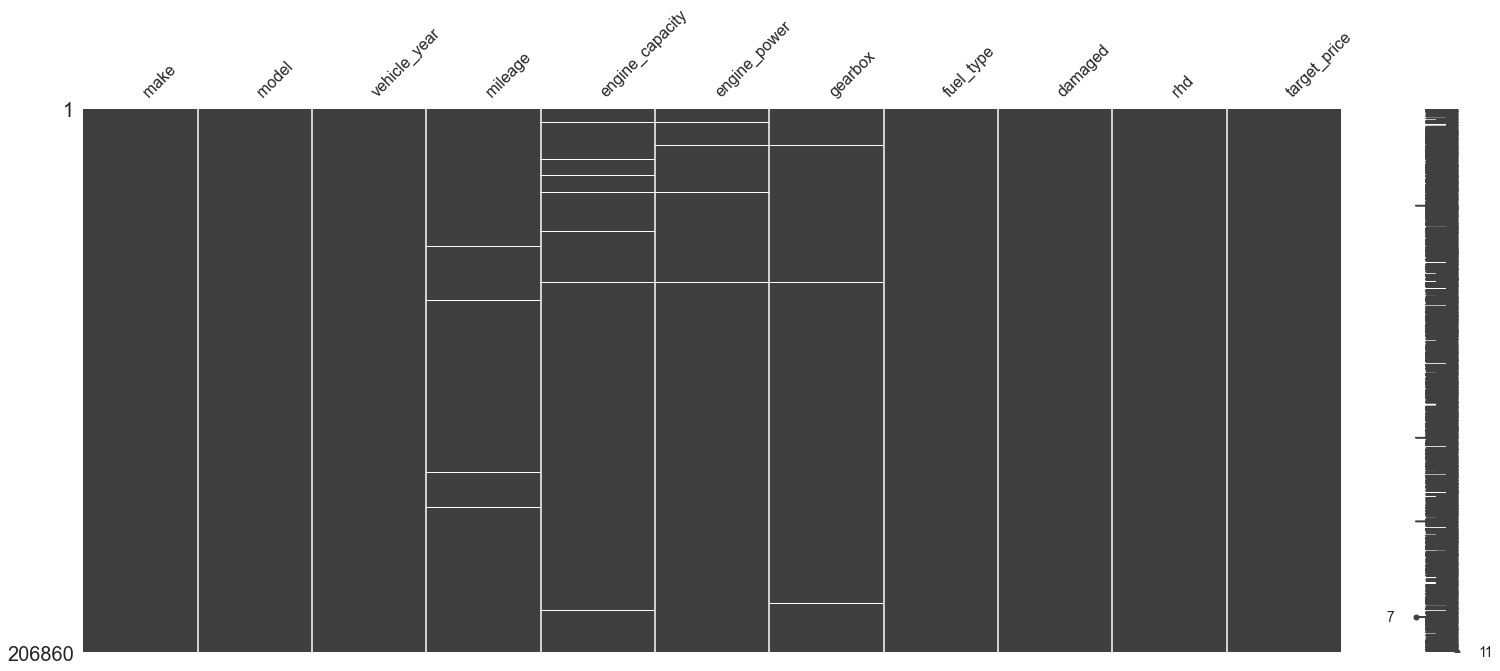

In [13]:
msno.matrix(df)
plt.show()

Wiersze zazwyczaj nie zawierają brakujących danych we wszystkich kolumnach, w których występują braki.

In [14]:
sum(df.duplicated())

4939

Występują powtarzające się rekordy

In [28]:
df[(
    (df['target_price'] < 0) |
    (df['mileage'] < 0) |
    (df['vehicle_year'] < 1900) |
    (df['engine_capacity'] < 0) |
    (df['engine_power'] < 0)
    )].size

0

Brak błędnych wartości w danych

## EDA

### Podział na zbiory treningowe i testowe

In [34]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=128)

In [35]:
train_df.describe()

,vehicle_year,mileage,engine_capacity,engine_power,damaged,rhd,target_price
count,144802.000000,1.438350e+05,143285.000000,143694.000000,144802.000000,144802.000000,1.448020e+05
mean,2012.300907,7.655394e+05,1867.210978,151.457382,0.038929,0.003253,6.264079e+04
std,6.472215,2.389059e+08,711.385072,77.015990,0.193426,0.056940,8.647640e+04
min,1917.000000,1.000000e+00,400.000000,1.000000,0.000000,0.000000,6.000000e+02
25%,2008.000000,4.530000e+04,1461.000000,105.000000,0.000000,0.000000,1.790000e+04
50%,2013.000000,1.375000e+05,1798.000000,136.000000,0.000000,0.000000,3.590000e+04
75%,2017.000000,1.990000e+05,1997.000000,170.000000,0.000000,0.000000,7.490000e+04
max,2021.000000,9.060612e+10,8400.000000,1500.000000,1.000000,1.000000,5.250000e+06


### Rozkład zmiennej celu

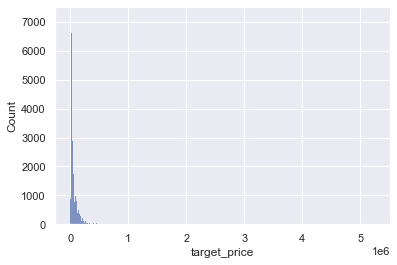

In [36]:
sns.histplot(train_df['target_price'])
plt.show()

In [15]:
numeric_columns = train_df.select_dtypes('number').columns.to_list()
numeric_columns

['vehicle_year',
 'mileage',
 'engine_capacity',
 'engine_power',
 'damaged',
 'rhd',
 'target_price']

In [24]:
train_df['rhd'].unique()

array([0., 1.])

In [25]:
train_df['damaged'].unique()

array([0., 1.])

Zmienne `rhd` i `damaged` to tak naprawdę zmienne kategoryczne

In [16]:
categorical_columns = train_df.select_dtypes('object').columns.to_list()
categorical_columns

['make', 'model', 'gearbox', 'fuel_type']

In [37]:
for col in categorical_columns:
    unique_vals = train_df[col].unique()
    if len(unique_vals) < 20:
        print(col, "unique elements:", unique_vals)
    else:
        print(col, "number of unique elements:", len(unique_vals))

make number of unique elements: 105
model number of unique elements: 1104
gearbox unique elements: ['automatic' 'manual' nan 'dual-clutch' 'cvt' 'semi-automatic'
 'automatic-stepless' 'automatic-sequential' 'automated-manual'
 'automatic-stepless-sequential' 'manual-sequential']
fuel_type unique elements: ['petrol' 'diesel' 'petrol-lpg' 'electric' 'hybrid' 'petrol-cng']


In [ ]:
# kodowanie marki i modeli: mało popularne -> 'Other' potem one hot
# gearbox i fuel_type: onehot